In [2]:
# import package
import shap
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import os

## LSTM

In [103]:
# load data
model1 = pd.read_excel('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/data/model/model.xlsx',index_col=0)
# Splitting 80% for training and 20% for testing
train_data = model1[:-323]
test_data = model1[-323:]
test_data=test_data.drop(['lg_price'], axis=1)
test_data.head()

,lg_market-cap,lg_trade-volume,lg_transaction-fees-usd,lg_avg-confirmation-time,lg_difficulty,lg_High,lg_Low,lg_hash-rate,block-size,lg_miners-revenue,...,lg_output-volume,Confidence,lg_Gold,News Regulation,GT_legal,GT_cryptocurrency,GT_scam,lg_SP500,lg_Oil,Theft
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-07-16,25.858064,18.239083,13.477778,4.628986,30.48438,9.129586,9.110741,18.579981,288129.485110,15.952780,...,13.773640,98.07042,7.521053,0,2.0,6,8,8.073284,3.72497,0
2020-07-17,25.859998,18.298868,13.467317,4.608774,30.48438,9.124989,9.115095,18.438010,288302.901448,15.822276,...,13.760712,98.07042,7.521053,1,2.0,6,8,8.073284,3.72497,0
2020-07-18,25.855256,18.087758,13.462705,4.404061,30.48438,9.126828,9.118959,18.534860,288452.151843,15.926603,...,13.757640,98.07042,7.521053,0,2.0,6,8,8.073284,3.72497,0
2020-07-19,25.849726,17.214529,12.961617,5.274719,30.48438,9.129651,9.116733,18.542523,288617.983775,15.898773,...,13.753142,98.07042,7.521053,0,2.0,6,4,8.073284,3.72497,0
2020-07-20,25.853631,17.305921,13.488320,5.376085,30.48438,9.128957,9.120405,18.616086,288792.666336,15.991382,...,13.724514,98.07042,7.521053,0,2.0,6,4,8.073284,3.72497,0


In [104]:
# create data for training
x_train = train_data.drop(['lg_price'], axis=1).values
# scale
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
# prepare y_train
y_train = train_data['lg_price'].values
x_test=test_data
x_test = test_data.values
# scaling
x_test = scale.transform(x_test)
# Check test data

In [160]:
## Modelo usado inicialmente (tudo igual)
lstm = Sequential()

lstm.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units =128, activation='relu', return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units =128, activation='relu', return_sequences=False))
lstm.add(Dropout(0.2))
lstm.add(Dense(units=1)) # Prediction of the next value

lstm.compile(optimizer='adam', loss='mean_squared_error')
lstm.summary()

history = lstm.fit(x_train, y_train, epochs = 25, batch_size=32, validation_split=0.2)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 29, 128)           66560     
                                                                 
 dropout_76 (Dropout)        (None, 29, 128)           0         
                                                                 
 lstm_43 (LSTM)              (None, 29, 128)           131584    
                                                                 
 dropout_77 (Dropout)        (None, 29, 128)           0         
                                                                 
 lstm_44 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_78 (Dropout)        (None, 128)               0         
                                                                 
 dense_60 (Dense)            (None, 1)               

In [148]:
# Modelo nao meu que funcionava adaptado aos meus tipos de dados e com os meus dados
model = Sequential()
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='relu'))
# compile model
model.compile(optimizer='adam', loss='mean_squared_error')
# fit model
history=model.fit(x_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10
17/17 [==============================] - 1s 12ms/step - loss: 64.8676 - val_loss: 61.0226
Epoch 2/10
17/17 [==============================] - 0s 4ms/step - loss: 37.4805 - val_loss: 24.6512
Epoch 3/10
17/17 [==============================] - 0s 4ms/step - loss: 22.3648 - val_loss: 9.8079
Epoch 4/10
17/17 [==============================] - 0s 4ms/step - loss: 18.7783 - val_loss: 8.8174
Epoch 5/10
17/17 [==============================] - 0s 4ms/step - loss: 17.6622 - val_loss: 6.5117
Epoch 6/10
17/17 [==============================] - 0s 4ms/step - loss: 14.6939 - val_loss: 5.5303
Epoch 7/10
17/17 [==============================] - 0s 4ms/step - loss: 12.1173 - val_loss: 5.3362
Epoch 8/10
17/17 [==============================] - 0s 4ms/step - loss: 11.7053 - val_loss: 5.5784
Epoch 9/10
17/17 [==============================] - 0s 5ms/step - loss: 10.4652 - val_loss: 4.4937
Epoch 10/10
17/17 [==============================] - 0s 5ms/step - loss: 9.5230 - val_loss: 4.8969


In [153]:
# Predicting the values for lg_price
pred = model.predict(x_test)
print(pred[:5]) # Printing lg_price for the next 5 day to check if the values make sense
print(len(pred))    

[[6.9343996]
 [6.1026773]
 [6.659013 ]
 [7.253477 ]
 [7.1483383]]
323


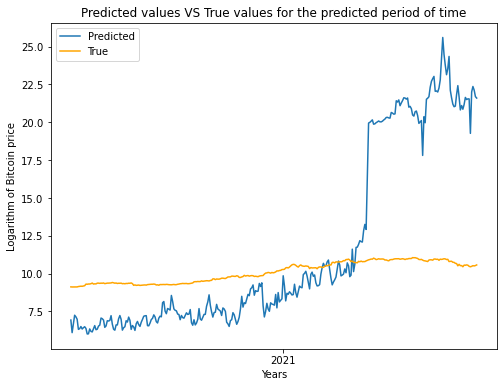

In [154]:
# Plotting the Predicted Bitcin price VS True Bitcoin price for the predicted period of time
original_test=model1.iloc[-323:,0]
date = original_test.index
fig, ax = plt.subplots(figsize=(8, 6))
year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator) # Locator for major axis only.
plt.plot(date, pred)
plt.plot(date, original_test,color='orange')
plt.title('Predicted values VS True values for the predicted period of time')
plt.xlabel('Years')
plt.ylabel('Logarithm of Bitcoin price')
plt.legend(['Predicted', 'True'])
#plt.savefig('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/Figuras/originalVSpred.jpeg')
plt.show()

In [155]:
from sklearn.metrics import mean_squared_error
actual_price = model1[-323:]['lg_price'].values

# 1. MSE - Mean Squared Error
MSE2 = mean_squared_error(actual_price,pred)
print("Mean Square Error: ", MSE2)

# 2. RMSE - Root Mean Square Error
RMSE2 = math.sqrt(MSE2)
print("Root Mean Square Error: ", RMSE2)

# 3. sMAPE - symmetric Mean Absolute Percentage Error
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f)))
sMAPE2=smape(actual_price,pred)
print('sMAPE: ',sMAPE2)

# 4. R^2 score
r2_score2 = metrics.r2_score(actual_price,pred)
print('R^2 score: ',r2_score2)

Mean Square Error:  32.75313946692568
Root Mean Square Error:  5.7230358610553616
sMAPE:  124.076814504461
R^2 score:  -71.8744520246224


## SHAP

**(A) - Global Interpretability**

In [128]:
# compute SHAP values
explainer = shap.DeepExplainer(model, x_train)
shap_values = explainer.shap_values(x_test)

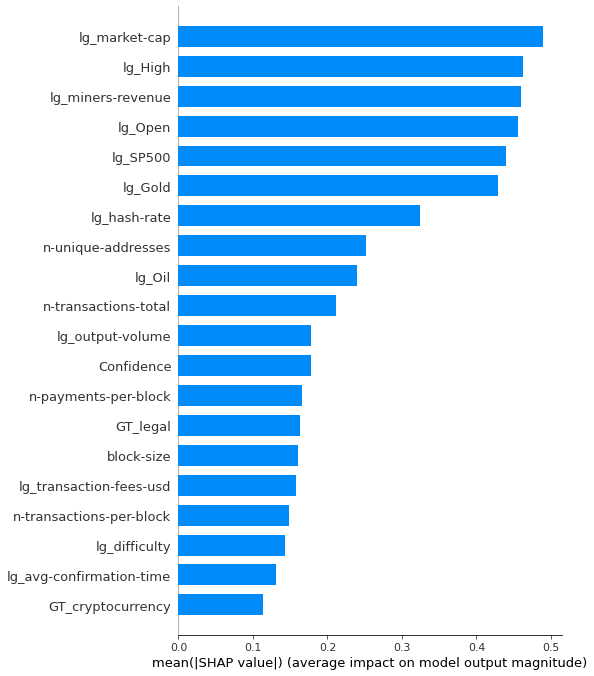

In [129]:
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = test_data.columns)

**(B) - Local Interpretability**

In [69]:
shap.initjs()
shap.force_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = test_data.columns)

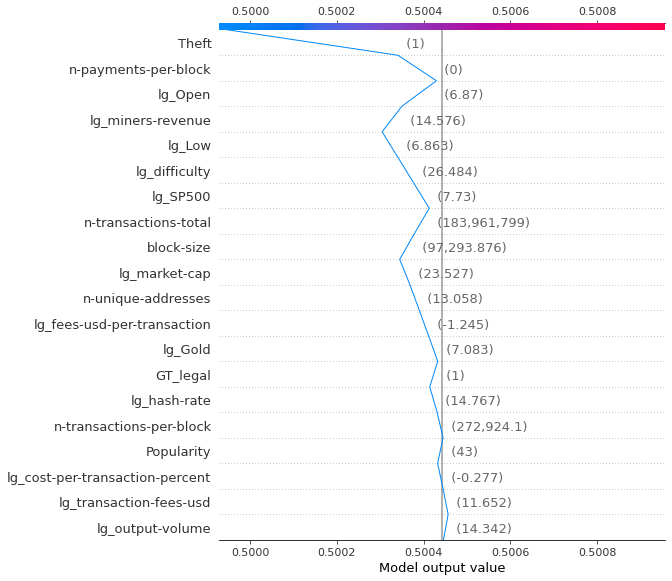

In [70]:
shap.decision_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = test_data.iloc[0,:], feature_names = test_data.columns.tolist())

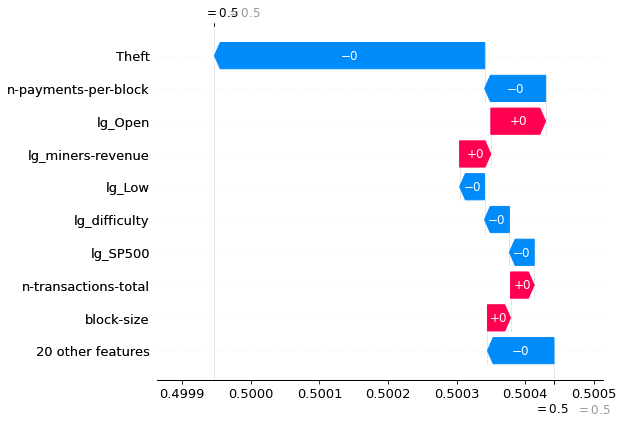

In [71]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(), shap_values[0][0], feature_names = test_data.columns)

In [72]:
?shap.plots._waterfall.waterfall_legacy

Signature:
shap.plots._waterfall.waterfall_legacy(
    expected_value,
    shap_values=None,
    features=None,
    feature_names=None,
    max_display=10,
    show=True,
)
Docstring:
Plots an explanation of a single prediction as a waterfall plot.

The SHAP value of a feature represents the impact of the evidence provided by that feature on the model's
output. The waterfall plot is designed to visually display how the SHAP values (evidence) of each feature
move the model output from our prior expectation under the background data distribution, to the final model
prediction given the evidence of all the features. Features are sorted by the magnitude of their SHAP values
with the smallest magnitude features grouped together at the bottom of the plot when the number of features
in the models exceeds the max_display parameter.

Parameters
----------
expected_value : float
    This is the reference value that the feature contributions start from. For SHAP values it should
    be the value 